# Initialisation

Load, clean, and edit data as required

In [1]:
pip install finta

Note: you may need to restart the kernel to use updated packages.


In [31]:
# Import required libraries
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from finta import TA



In [32]:
# Import required trading data
trading_df = pd.read_csv(
    Path("Data/googl_data.csv"), 
    index_col="Date", 
    infer_datetime_format=True, 
    parse_dates=True
)

# Display sample data
trading_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-07,845.000000,845.880005,837.299988,842.099976,842.099976,1111600
2017-04-10,841.539978,846.739990,840.789978,841.700012,841.700012,1046200
2017-04-11,841.700012,844.630005,834.599976,839.880005,839.880005,974300
2017-04-12,838.460022,843.719971,837.590027,841.460022,841.460022,1135800
2017-04-13,841.039978,843.729980,837.849976,840.179993,840.179993,1073700


In [33]:
# Check for nulls

trading_df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [34]:
# Calculate the daily returns using the closing prices and the pct_change function
trading_df["actual_returns"] = trading_df["Close"].pct_change()

# Drop all NaN values from the DataFrame
trading_df = trading_df.dropna()

# Review the DataFrame
display(trading_df.head())
display(trading_df.tail())

,Open,High,Low,Close,Adj Close,Volume,actual_returns
Date,,,,,,,
2017-04-10,841.539978,846.739990,840.789978,841.700012,841.700012,1046200,-0.000475
2017-04-11,841.700012,844.630005,834.599976,839.880005,839.880005,974300,-0.002162
2017-04-12,838.460022,843.719971,837.590027,841.460022,841.460022,1135800,0.001881
2017-04-13,841.039978,843.729980,837.849976,840.179993,840.179993,1073700,-0.001521
2017-04-17,841.380005,855.640015,841.030029,855.130005,855.130005,1049100,0.017794


,Open,High,Low,Close,Adj Close,Volume,actual_returns
Date,,,,,,,
2022-03-31,2841.060059,2842.159912,2780.489990,2781.350098,2781.350098,1876200,-0.020227
2022-04-01,2790.000000,2809.419922,2766.149902,2803.010010,2803.010010,1296700,0.007788
2022-04-04,2807.169922,2874.239990,2806.209961,2859.429932,2859.429932,1297100,0.020128
2022-04-05,2857.379883,2859.810059,2807.649902,2811.820068,2811.820068,1070900,-0.016650
2022-04-06,2775.000000,2787.209961,2710.340088,2730.959961,2730.959961,1621000,-0.028757


# Define X values (features)

For this example we will use short and long SMA windows of the close price in our data

In [106]:
# Define a window size of 4
short_window = 4

# Create an SMA that uses short_window, and assign it to a new column named “sma_fast”
trading_df["sma_fast"] = trading_df["Close"].rolling(window=short_window).mean()

In [107]:
# Define a window size of 100
long_window = 100

# Create an SMA that uses long_window, and assign it to a new columns named “sma_slow”
trading_df["sma_slow"] = trading_df["Close"].rolling(window=long_window).mean()

In [108]:
# Drop the NaNs using dropna()
trading_df = trading_df.dropna()

In [109]:
# Assign a copy of the `sma_fast` and `sma_slow` columns to a new DataFrame called `X`
# Shift X values 1 day forward to predict next day prices
X = trading_df[["sma_fast", "sma_slow"]].shift().dropna().copy()

# Display sample data
display(X.head())
display(X.tail())

,sma_fast,sma_slow
Date,,
2018-01-24,1154.950012,1027.029702
2018-01-25,1163.780029,1029.306302
2018-01-26,1173.440033,1031.575302
2018-01-29,1179.290039,1033.931003
2018-01-30,1181.867523,1036.381003


,sma_fast,sma_slow
Date,,
2022-03-31,2837.862549,2794.726108
2022-04-01,2824.835083,2792.769209
2022-04-04,2818.310059,2790.993108
2022-04-05,2820.640015,2789.803706
2022-04-06,2813.902527,2788.743206


### Bollinger Bands

#### Bollinger Bands are volatility bands placed above and below a moving average. Volatility is based on the standard deviation, which changes as volatility increases and decreases. The bands automatically widen when volatility increases and contract when volatility decreases. Their dynamic nature allows them to be used on different securities with the standard settings.

In [110]:
bb_signals_df = trading_df.copy()
bbands_df = TA.BBANDS(bb_signals_df)
#bbands_df.tail()
bollinger_df = pd.DataFrame(bbands_df)
bollinger_df.tail()


,BB_UPPER,BB_MIDDLE,BB_LOWER
Date,,,
2022-03-31,2924.601996,2701.960522,2479.319049
2022-04-01,2935.093366,2710.204529,2485.315692
2022-04-04,2943.780434,2726.797522,2509.814610
2022-04-05,2941.915163,2740.284021,2538.652879
2022-04-06,2942.269673,2743.412024,2544.554375


NameError: name 'Date' is not defined

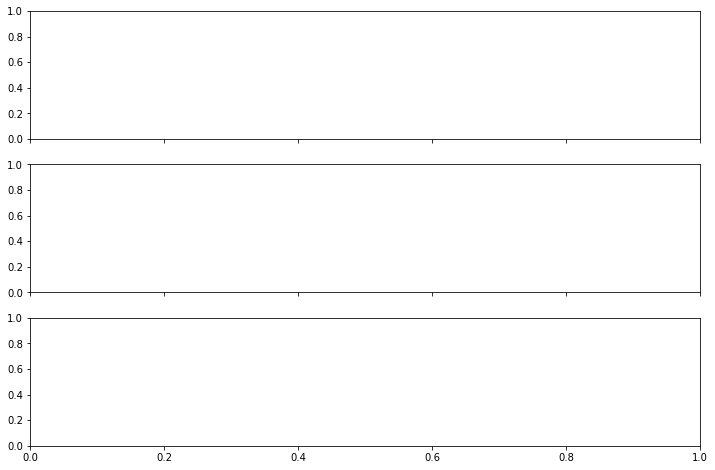

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
ax0.plot(index, price['AdjClose'], label='AdjClose')
ax0.set_xlabel('Date')
ax0.set_ylabel('AdjClose')
ax0.grid()
for day, holding in holdings.iterrows():
    order = holding['Order']
    if order > 0:
        ax0.scatter(x=day, y=price.loc[day, 'AdjClose'], color='green')
    elif order < 0:
        ax0.scatter(x=day, y=price.loc[day, 'AdjClose'], color='red')

ax1.plot(index, price['RSI'], label='RSI')
ax1.fill_between(index, y1=30, y2=70, color='#adccff', alpha='0.3')
ax1.set_xlabel('Date')
ax1.set_ylabel('RSI')
ax1.grid()

ax2.plot(index, price['BB_up'], label='BB_up')
ax2.plot(index, price['AdjClose'], label='AdjClose')
ax2.plot(index, price['BB_low'], label='BB_low')
ax2.fill_between(index, y1=price['BB_low'], y2=price['BB_up'], color='#adccff', alpha='0.3')
ax2.set_xlabel('Date')
ax2.set_ylabel('Bollinger Bands')
ax2.grid()

fig.tight_layout()
plt.show()



### Relative Strength Index (RSI)

#### Compares the magnitude of recent gains and losses over a specified time period to measure speed and change of price movements of a security. It is primarily used to attempt to identify overbought or oversold conditions in the trading of an asset.

In [111]:
#Calculating RSI manually 
rsi_data = pd.DataFrame(trading_df["Close"])
rsi_data["Diff"] = rsi_data.diff(1)

# Calculate Avg. Gains/Losses
rsi_data['Gain'] = rsi_data['Diff'].clip(lower=0).round(2)
rsi_data['Loss'] = rsi_data['Diff'].clip(upper=0).abs().round(2)

# Get initial Averages
window_length = 14
rsi_data['avg_gain'] = rsi_data['Gain'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
rsi_data['avg_loss'] = rsi_data['Loss'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
#print(rsi_data.iloc[window_length-1: window_length+2])

# Average Gains
for i, row in enumerate(rsi_data['avg_gain'].iloc[window_length+1:]):
    rsi_data['avg_gain'].iloc[i + window_length + 1] =\
        (rsi_data['avg_gain'].iloc[i + window_length] *
         (window_length - 1) +
         rsi_data['Gain'].iloc[i + window_length + 1])\
        / window_length
    
# Average Losses
for i, row in enumerate(rsi_data['avg_loss'].iloc[window_length+1:]):
    rsi_data['avg_loss'].iloc[i + window_length + 1] =\
        (rsi_data['avg_loss'].iloc[i + window_length] *
         (window_length - 1) +
         rsi_data['Loss'].iloc[i + window_length + 1])\
        / window_length
    
# View initial results
#print(rsi_data[window_length-1:window_length+5])

# Calculate RS Values
rsi_data['rs'] = rsi_data['avg_gain'] / rsi_data['avg_loss']

# Calculate RSI
rsi_data['rsi'] = 100 - (100 / (1.0 + rsi_data['rs']))

# View Result
print(rsi_data)

#rsi_data_finta = TA.RSI(trading_df)
#rsi_data_finta.tail()

                  Close       Diff   Gain   Loss   avg_gain   avg_loss  \
Date                                                                     
2018-01-23  1176.170044        NaN    NaN    NaN        NaN        NaN   
2018-01-24  1171.290039  -4.880005   0.00   4.88        NaN        NaN   
2018-01-25  1182.140015  10.849976  10.85   0.00        NaN        NaN   
2018-01-26  1187.560059   5.420044   5.42   0.00        NaN        NaN   
2018-01-29  1186.479980  -1.080078   0.00   1.08        NaN        NaN   
...                 ...        ...    ...    ...        ...        ...   
2022-03-31  2781.350098 -57.419922   0.00  57.42  21.811794  18.123178   
2022-04-01  2803.010010  21.659912  21.66   0.00  21.800951  16.828665   
2022-04-04  2859.429932  56.419922  56.42   0.00  24.273741  15.626617   
2022-04-05  2811.820068 -47.609863   0.00  47.61  22.539902  17.911145   
2022-04-06  2730.959961 -80.860107   0.00  80.86  20.929909  22.407492   

                  rs        rsi  
Dat

### Average Directional Movement Index (ADX)

#### The Plus Directional Indicator (+DI) and Minus Directional Indicator (-DI) are derived from smoothed averages of these differences, and measure trend direction over time. These two indicators are often referred to collectively as the Directional Movement Indicator (DMI).

#### The Average Directional Index (ADX) is in turn derived from the smoothed averages of the difference between +DI and -DI, and measures the strength of the trend (regardless of direction) over time.

In [112]:
#Average Directional Movement Index (ADX)
#
adx_df = TA.ADX(trading_df)
adx_df

Date
2018-01-23          NaN
2018-01-24          NaN
2018-01-25          NaN
2018-01-26          NaN
2018-01-29          NaN
                ...    
2022-03-31    20.062786
2022-04-01    18.788867
2022-04-04    18.849126
2022-04-05    18.905080
2022-04-06    18.130484
Name: 14 period ADX., Length: 1060, dtype: float64

### Average True Range (ATR)
####  The indicator provide an indication of the degree of price volatility. Strong moves, in either direction, are often accompanied by large ranges, or large True Ranges.

In [113]:
#Average True Range 
atr_df = TA.ATR(trading_df)
atr_df

Date
2018-01-23          NaN
2018-01-24          NaN
2018-01-25          NaN
2018-01-26          NaN
2018-01-29          NaN
                ...    
2022-03-31    63.693569
2022-04-01    59.450003
2022-04-04    58.632132
2022-04-05    55.788574
2022-04-06    60.329276
Name: 14 period ATR, Length: 1060, dtype: float64

# Define Y (Target)

In this example we use a trading signal that throws a long when actual returns are positive (when the price is going up) and a short when actual returns are negative

In [14]:
# Create a new column in the `trading_df` called "signal" setting its value to zero.
trading_df["signal"] = 0.0

In [15]:
# Create the signal to buy
trading_df.loc[(trading_df["actual_returns"] >= 0), "signal"] = 1

In [16]:
# Create the signal to sell
trading_df.loc[(trading_df["actual_returns"] < 0), "signal"] = -1

In [17]:
# Copy the new "signal" column to a new Series called `y`.
y = trading_df["signal"].copy()

# Split training and testing data

We need to do this manually since our data is sequential and we can't have splitting functions randomise data

The offset will determine how big the training/testing datasets will be. We will use 12 months for now

In [18]:
# Import required libraries
from pandas.tseries.offsets import DateOffset

In [19]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2017-08-31 00:00:00


In [20]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=12)

# Display the training end date
print(training_end)

2018-08-31 00:00:00


In [21]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

In [22]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Scale Data

In [23]:
# Import required libraries
from sklearn.preprocessing import StandardScaler

In [24]:
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create the model

Here we are using an svc model which is a classifier from sklearn

In [25]:
# Import the SVM model
from sklearn import svm
from sklearn.metrics import classification_report

In [26]:
# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([ 1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.])

# Evaluate model and produce metrics

We evaluate the model's training data to see how well its training went, then predict using the model and testing data, and run some metrics

In [27]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)

# Display the report
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.95      0.97      0.96       117
         1.0       0.97      0.96      0.96       136

    accuracy                           0.96       253
   macro avg       0.96      0.96      0.96       253
weighted avg       0.96      0.96      0.96       253



In [28]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [29]:
# Evaluate the model's ability to predict the trading signal for the testing data
testing_report = classification_report(y_test, testing_signal_predictions)

# Display the report
print(testing_report)

              precision    recall  f1-score   support

        -1.0       0.54      1.00      0.70       413
         1.0       1.00      0.29      0.45       493

    accuracy                           0.61       906
   macro avg       0.77      0.65      0.58       906
weighted avg       0.79      0.61      0.56       906



In [30]:
# Plots
signals_df = pd.DataFrame({"training": training_signal_predictions, "testing":testing_signal_predictions})
signals_df.head()

ValueError: All arrays must be of the same length